In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [8]:
from sklearn.cluster import KMeans
from sklearn.cluster import dbscan

from sklearn.datasets import load_iris

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [13]:
ruspini = pd.read_csv("ruspini.csv")

In [20]:
import random as rnd

In [14]:
ruspini.head()

,Unnamed: 0,x,y
0,1,4,53
1,2,5,63
2,3,10,59
3,4,9,77
4,5,13,49


In [17]:
x, y = ruspini["x"], ruspini["y"]

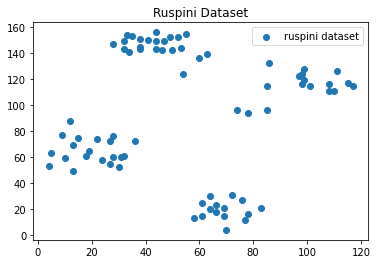

In [19]:
plt.scatter(x,y,label="ruspini dataset")
plt.title("Ruspini Dataset")
plt.legend()
plt.show()

In [ ]:
# Q1 : from the above graph, 4 clusters could be observed

In [109]:
def centroid_index(x,k):
    return np.random.randint(low=0, high=len(x), size=k)

In [120]:
def distance(vecteur1,vecteur2):
    vecteur1 = np.array(vecteur1)
    vecteur2 = np.array(vecteur2)
    distance = np.sqrt(np.sum((vecteur1 - vecteur2) ** 2))
    return distance

In [121]:
def closest_c(centroid, point):
    index = 0
    dist = distance(centroid[0],point)
    for i in range(1,len(centroid)):
        if distance(centroid[i],point)<dist:
            index = i
            dist = distance(centroid[i],point)
    c = np.zeros(len(centroid))
    c[index]=1
    return c

In [112]:
centroid_index = centroid_index(x,4) 

In [113]:
centroid = []
for index in centroid_index:
    #print(index)
    centroid.append((x[index],y[index]))

In [114]:
centroid

[(52, 152), (27, 55), (69, 21), (27, 55)]

In [115]:
points = []
for i in range(len(x)):
    points.append((x[i],y[i]))

In [125]:
c = []
for point in points:
    c.append(closest_c(centroid, point))

In [128]:
[2,4]/2

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [123]:
def KMean(centroid,points):
    error = 0.001
    
    
    new_centroid=[]
    #compute the new centroid
    for i in range(len(centroid)):
        num0, num1 = 0,0
        for k in range(len(c)):
            num0+=c[k][i]*points[k][0]
            num1+=c[k][i]*points[k][1]
        dem = 0
        for j in range(len(c)):
            dem+=c[j][i]
    
        new_centroid.append([num0/dem, num1/dem])
    

[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0.

In [132]:
#KMeans avec scikitlearn
kmeans=KMeans(n_clusters=4, n_init=1, init='k-means++').fit(ruspini)
centers = kmeans.cluster_centers_
print(centers)

[[ 52.          98.17647059 114.88235294]
 [ 32.          43.91304348 146.04347826]
 [ 68.          68.93333333  19.4       ]
 [ 10.5         20.15        64.95      ]]


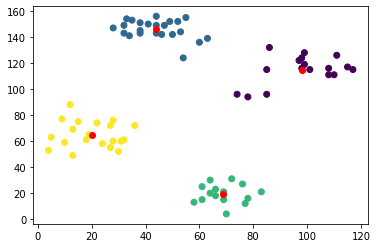

In [133]:
kmeans.labels_
plt.scatter(ruspini['x'], ruspini['y'], c=kmeans.labels_)
plt.scatter(centers[:,1], centers[:,2], c="red")

In [137]:
range_n_clusters = [int(i) for i in np.linspace(2,10,9)]

In [139]:
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=10).fit(ruspini)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(ruspini, cluster_labels)
    
    print("for n=",n,"silhouette score=",silhouette_avg)

for n= 2 silhouette score= 0.5393208837562198
for n= 3 silhouette score= 0.6570531855325802
for n= 4 silhouette score= 0.7459402473705687
for n= 5 silhouette score= 0.7027786230562486
for n= 6 silhouette score= 0.6186953517303782
for n= 7 silhouette score= 0.5453528700650744
for n= 8 silhouette score= 0.5007795677996052
for n= 9 silhouette score= 0.5116013927399284
for n= 10 silhouette score= 0.5198437323231534


In [135]:
# the score of n=4 is the closest to 1 so 4 clusters is the best estimation

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

## DBCAN

In [140]:
from sklearn.cluster import DBSCAN

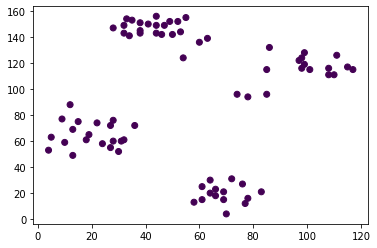

In [144]:
clusterer= DBSCAN(eps=0.05, min_samples=10).fit(ruspini)
clusterer_labels = clusterer.labels_
plt.scatter(ruspini['x'], ruspini['y'], c=clusterer.labels_)

In [ ]:
## Iris

In [145]:
data = load_iris()
X = data.data
Y = data.target

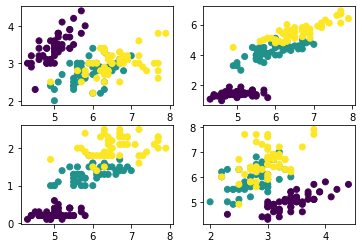

In [151]:
plt.subplot(2,2,1)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.subplot(2,2,2)
plt.scatter(X[:,0],X[:,2],c=Y)
plt.subplot(2,2,3)
plt.scatter(X[:,0],X[:,3],c=Y)
plt.subplot(2,2,4)
plt.scatter(X[:,1],X[:,0],c=Y)

In [159]:
#KMeans avec scikitlearn
range_n_clusters= [int(i) for i in range(np.linspace(2,10,9))]

for n in range_n_clusters:
    kmeans=KMeans(n_clusters=n, n_init=10).fit(ruspini)
    labels = kmeans.labels_
    silhouette = silhouette_score(X, labels)
    
    print("for n=",n,"the silhouette score is=", silhouette)

TypeError: only integer scalar arrays can be converted to a scalar index

In [160]:
range_n_clusters

[2, 3, 4, 5, 6, 7, 8, 9, 10]

ValueError: 'c' argument has 75 elements, which is inconsistent with 'x' and 'y' with size 150.

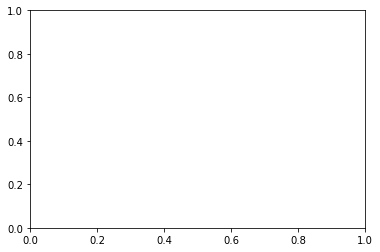

In [154]:
centers = kmeans.labels_
plt.scatter(X[:,0],X[:,1],c=labels)